In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

# stock data

## Loading data

In [2]:
stock_Brazil=pd.read_csv("Stock major indicies/Bovespa Historical Data_Brazil.csv")

In [3]:
stock_Brazil['Country']='Brazil'

In [5]:
stock_India=pd.read_csv("Stock major indicies/BSE Sensex 30 Historical Data_India.csv")

In [6]:
stock_India['Country']='India'

In [7]:
stock_France=pd.read_csv("Stock major indicies/CAC 40 Historical Data_Paris.csv")

In [8]:
stock_France['Country']='France'

In [9]:
stock_Germany=pd.read_csv("Stock major indicies/DAX Historical Data_Germany.csv")

In [10]:
stock_Germany['Country']='Germany'

In [11]:
stock_US=pd.read_csv("Stock major indicies/Dow Jones Industrial Average Historical Data_US.csv")
# There is two us indexes which should we choose? (S&P 500 Historical Data_US.csv)

In [12]:
stock_US['Country']='US'

In [13]:
stock_UK=pd.read_csv("Stock major indicies/FTSE 100 Historical Data_UK.csv")

In [14]:
stock_UK['Country']='UK'

In [15]:
stock_Italy=pd.read_csv("Stock major indicies/FTSE MIB Historical Data_Italy.csv")

In [16]:
stock_Italy['Country']='Italy'

In [17]:
stock_Spain=pd.read_csv("Stock major indicies/IBEX 35 Historical Data_Spain.csv")

In [18]:
stock_Spain['Country']='Spain'

In [19]:
stock_Korea=pd.read_csv("Stock major indicies/KOSPI Historical Data_South Korea.csv")

In [20]:
stock_Korea['Country']='Korea'

In [21]:
stock_Japan=pd.read_csv("Stock major indicies/Nikkei 225 Historical Data_Japan.csv")

In [22]:
stock_Japan['Country']='Japan'

In [23]:
stock_Denmark=pd.read_csv("Stock major indicies/OMX Copenhagen 20 Historical Data_Denmark.csv")

In [24]:
stock_Denmark['Country']='Denmark'

In [25]:
stock_Australia=pd.read_csv("Stock major indicies/S&P_ASX 200 Historical Data_Austrila.csv")

In [26]:
stock_Australia['Country']='Australia'

In [27]:
stock_Canada=pd.read_csv("Stock major indicies/S&P_TSX Composite Historical Data_Canada.csv")

In [28]:
stock_Canada['Country']='Canada'

In [29]:
stock_China=pd.read_csv("Stock major indicies/Shanghai Composite Historical Data_China.csv")

In [30]:
stock_China['Country']='China'

In [32]:
stock_SouthAfrica=pd.read_csv("Stock major indicies/South-Africa-Top-40-Historical-Data_South-Africa.csv")

In [33]:
stock_SouthAfrica['Country']='South Africa'

In [35]:
stock_data=pd.concat([stock_Brazil,stock_India,stock_France,stock_Germany,stock_US,stock_UK,stock_Italy,stock_Spain,stock_Korea,stock_Japan,stock_Denmark,stock_Australia,stock_Canada,stock_China,stock_SouthAfrica])

In [42]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

##  Checking data

In [43]:
print("Number of obsevations: {}".format(len(stock_data)))

Number of obsevations: 4804


We now take a look at which dates the stock data is available for

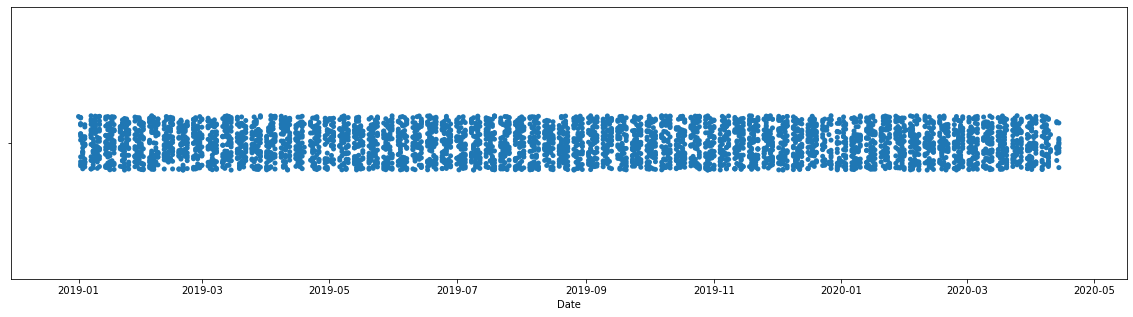

In [45]:
fig,ax =plt.subplots(figsize=(20,5))
ax = sns.stripplot(x=stock_data.Date)

We now take a look at the data which the change for each country

In [71]:
stock_data['Change %']=stock_data['Change %'].apply(lambda x: float(x[:-1]))

In [75]:
countries=list(stock_data.Country.unique())

In [78]:
changes=[]
for country in countries:
    changes.append(stock_data[stock_data.Country==country]["Change %"])

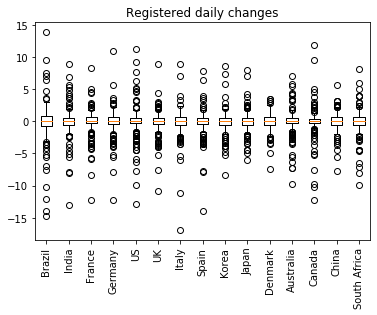

In [106]:
fig, ax = plt.subplots()
ax.set_title('Registered daily changes')
ax.boxplot(changes)
ax.set_xticklabels(countries,rotation=90)
plt.show()

In [103]:
fig = px.line(stock_data.groupby(['Date','Country'])[['Change %']].sum().reset_index(), x="Date", y="Change %", color='Country',title='Daily change in stock index')
fig.show()

In [105]:
fig = px.line(stock_data.groupby(['Date','Country'])[['Price']].sum().reset_index(), x="Date", y="Price", color='Country',title='Daily Price for stock index')
fig.show()

### Covid 19 data

In [36]:
FocusCountries = set(['Brazil','India','US','Italy','Germany','United Kingdom','South Korea','China','Denmark','South Africa','Canada','Australia','Spain','Japan'])

In [ ]:
covid_df = pd.read_csv("Covid-19 data/covid-19-all.csv")
covid_df['Date'] = pd.to_datetime(covid_df['Date'])
covid_df['Week'] = covid_df['Date'].dt.to_period('W')
covid_df[['Confirmed','Recovered','Deaths']] = covid_df[['Confirmed','Recovered','Deaths']].fillna(0).astype(int)
recent_date = covid_df['Date'].max()
latest_entry = covid_df[covid_df['Date'] >= recent_date]

In [ ]:
covid_df.head()

In [ ]:
covid_df.tail()

In [ ]:
covid_China_df=covid_df[covid_df['Country/Region']=='China']

In [ ]:
covid_China_df.tail()

In [ ]:
covid_Brazil_df=covid_df[covid_df['Country/Region']=='Brazil']

In [ ]:
covid_Brazil_df.tail()

In [ ]:
latest_entry = covid_df[covid_df['Date'] >= recent_date]
df_stats = covid_df.groupby(['Week','Country'])[['Confirmed','Recovered','Deaths']].sum().reset_index()
df_stats['Week'] = df_stats['Week'].astype(str)

fig = px.line(df_stats, x="Week", y="Confirmed", color='Country',title='Corona Virus Confirmed Count by Week')
fig.show()

fig = px.line(df_stats, x="Week", y="Recovered", color='Country',title='Corona Virus Recovered Count by Week')
fig.show()

fig = px.line(df_stats, x="Week", y="Deaths", color='Country',title='Corona Virus Death Count by Week')
fig.show()